In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate
import time
%matplotlib inline  
import sys
sys.path.append('/gpfs2/projects/project-bus_capstone_2016/workspace/mu529/Bus-Capstone')

# these two modules are homemade
import gtfs
import arrivals
import ttools
os.chdir('/gpfs2/projects/project-bus_capstone_2016/workspace/share')

In [131]:
# get all the schedule data. (subset can be created later)
trips = gtfs.load_trips('2015-12-03','gtfs/')
#stops = gtfs.load_stops('2015-12-03','gtfs/')
stop_times, tz_sched = gtfs.load_stop_times('2015-12-03','gtfs/')
tcal=gtfs.TransitCalendar('2015-12-03')
active_services = tcal.get_service_ids('2015-12-03')
active_trips = trips.service_id.isin(active_services)
active_stops = stop_times.reset_index().set_index('trip_id').loc[active_trips]
print 'Finished loading GTFS data.'

Finished loading GTFS data.


In [132]:
active_stops.shape

(2064230, 6)

In [138]:
active_stops['sched_hour'] = active_stops.arrival_time.str[:2].astype(int)
active_stops['sched_arrival_time'] = active_stops.arrival_time.apply(ttools.parseTime)

In [280]:
sched_times = active_stops.join(trips['route_id'],how='left')

In [281]:
sched_times = sched_times.reset_index().sort(['route_id','sched_arrival_time'])

sec = ttools.datetime.timedelta(seconds=1)
def sched_headways(df):
    return df.sort('sched_arrival_time')['sched_arrival_time'].diff()/sec

In [286]:
sec = ttools.datetime.timedelta(seconds=1)
sched_times['sched_headway'] = sched_times.groupby(['route_id','stop_id'])['sched_arrival_time'].diff()/sec

In [287]:
sched_times.iloc[200000:200400]

,trip_id,stop_id,arrival_time,departure_time,stop_sequence,pickup_type,drop_off_type,sched_arrival_time,sched_hour,route_id,sched_headway
930810,GA_D5-Weekday-SDon-075600_B38_208,303019,12:48:06,12:48:06,9,0,0,12:48:06,12,B38,480
842154,FP_D5-Weekday-SDon-074500_B38_112,303083,12:48:08,12:48:08,15,0,0,12:48:08,12,B38,283
843154,FP_D5-Weekday-SDon-075900_B38_121,303072,12:48:08,12:48:08,9,0,0,12:48:08,12,B38,600
841451,FP_D5-Weekday-SDon-073500_B38_116,303040,12:48:11,12:48:11,18,0,0,12:48:11,12,B38,528
929278,GA_D5-Weekday-SDon-073100_B62_819,303040,12:48:23,12:48:23,31,0,0,12:48:23,12,B38,12
929753,GA_D5-Weekday-SDon-074000_B38_205,303086,12:48:25,12:48:25,23,0,0,12:48:25,12,B38,480
930148,GA_D5-Weekday-SDon-074800_B62_806,303026,12:48:25,12:48:25,16,0,0,12:48:25,12,B38,286
840679,FP_D5-Weekday-SDon-072500_B38_106,504238,12:48:32,12:48:32,28,0,0,12:48:32,12,B38,600
843609,FP_D5-Weekday-SDon-076500_B38_109,307460,12:48:37,12:48:37,2,0,0,12:48:37,12,B38,540
931113,GA_D5-Weekday-SDon-076500_B38_211,307460,12:48:37,12:48:37,2,0,0,12:48:37,12,B38,0


In [288]:
sched_times.set_index(['trip_id','stop_id'],inplace=True,verify_integrity=True)

### FML

In [289]:
interpolated = pd.read_csv('20151203_interpolated.csv')

In [290]:
# interpolated['hour'] = interpolated.interpolated_arrival_time.str[:2]
interpolated['interpolated_arrival_time'] = pd.to_timedelta(interpolated['interpolated_arrival_time'])

In [113]:
interpolated.head()

,ROUTE_ID,TRIP_ID,trip_date,vehicle_id,STOP_ID,interpolated_arrival_time
0,BX7,KB_D5-Weekday-SDon-064000_BX7_15,2015-12-03,6260,404835,11:00:09.657724
1,BX7,KB_D5-Weekday-SDon-064000_BX7_15,2015-12-03,6260,404249,11:01:44.230114
2,BX7,KB_D5-Weekday-SDon-064000_BX7_15,2015-12-03,6260,402612,11:03:16.780136
3,BX7,KB_D5-Weekday-SDon-064000_BX7_15,2015-12-03,6260,402613,11:04:00.835741
4,BX7,KB_D5-Weekday-SDon-064000_BX7_15,2015-12-03,6260,403813,11:05:14.348069


In [291]:
merged = interpolated.merge(sched_times[['sched_arrival_time','sched_hour','sched_headway']],how='left',left_on=['TRIP_ID','STOP_ID'],right_index=True)

In [292]:
merged.head()

,ROUTE_ID,TRIP_ID,trip_date,vehicle_id,STOP_ID,interpolated_arrival_time,sched_arrival_time,sched_hour,sched_headway
0,BX7,KB_D5-Weekday-SDon-064000_BX7_15,2015-12-03,6260,404835,11:00:09.657724,11:08:40,11,720
1,BX7,KB_D5-Weekday-SDon-064000_BX7_15,2015-12-03,6260,404249,11:01:44.230114,11:10:00,11,720
2,BX7,KB_D5-Weekday-SDon-064000_BX7_15,2015-12-03,6260,402612,11:03:16.780136,11:11:17,11,720
3,BX7,KB_D5-Weekday-SDon-064000_BX7_15,2015-12-03,6260,402613,11:04:00.835741,11:12:36,11,720
4,BX7,KB_D5-Weekday-SDon-064000_BX7_15,2015-12-03,6260,403813,11:05:14.348069,11:14:26,11,720


In [293]:
# bools = interpolated.duplicated(subset=['route','trip_id','trip_date','vehicle_id','stop_id'],take_last=False) + interpolated.duplicated(subset=['route','trip_id','trip_date','vehicle_id','stop_id'],take_last=True)
# interpolated[bools].sort(['route','trip_id','trip_date','vehicle_id']).shape

In [294]:
merged.set_index(['ROUTE_ID','STOP_ID'],inplace=True)

## Get the densest stop_id by shape (trip?)

In [295]:
trip_groups = merged.groupby(level=(0,1)).size()

In [296]:
def series_max(s):
    return s.idxmax()[1]
densest_stops = trip_groups.groupby(level=(0)).apply(series_max)
densest_stops

ROUTE_ID
B1      300009
B100    350217
B103    307840
B11     301173
B12     301339
B13     301028
B14     301598
B15     301045
B16     301616
B17     300853
B2      300173
B20     300584
B24     302349
B25     302383
B26     302372
B3      300261
B31     302609
B32     302304
B35     302759
B36     300019
B37     302914
B38     303096
B39     403679
B4      300019
B41     303242
B42     303358
B43     303762
B44     303387
B44+    308057
B45     303531
         ...  
X10     400144
X10B    404891
X11     202039
X12     200534
X14     203343
X15     202124
X17     400165
X17A    404202
X17J    200393
X19     202090
X2      201022
X21     200375
X22     401851
X22A    250049
X27     404225
X28     404225
X3      201020
X30     200434
X31     201476
X37     300071
X38     404183
X4      200097
X42     200406
X5      402133
X63     402212
X64     402679
X68     500066
X7      405017
X8      200358
X9      201020
dtype: int64

In [297]:
merged = merged.set_index('interpolated_arrival_time',append=True,drop=False).sort_index()

In [298]:
sec = ttools.datetime.timedelta(seconds=1)
merged['inter_headway'] = merged.groupby(level=(0,1))['interpolated_arrival_time'].diff()/sec

In [299]:
merged.head()

TRIP_ID  \
ROUTE_ID STOP_ID interpolated_arrival_time                                    
B1       300000  12:24:19                   UP_D5-Weekday-SDon-073800_B1_13   
                 13:56:23.095049            UP_D5-Weekday-SDon-082300_B1_32   
                 14:01:22.946666            UP_D5-Weekday-SDon-083500_B1_34   
                 14:01:28.062980            UP_D5-Weekday-SDon-082500_B1_33   
                 14:07:18.102961            UP_D5-Weekday-SDon-084200_B1_36   

                                             trip_date  vehicle_id  \
ROUTE_ID STOP_ID interpolated_arrival_time                           
B1       300000  12:24:19                   2015-12-03        5085   
                 13:56:23.095049            2015-12-03        5088   
                 14:01:22.946666            2015-12-03        7154   
                 14:01:28.062980            2015-12-03        5096   
                 14:07:18.102961            2015-12-03        7155   

                                            interpolated_arrival_time  \
ROUTE_ID STOP_ID interpolated_arrival_time                              
B1       300000  12:24:19                                    12:24:19   
                 13:56:23.095049                      13:56:23.095049   
                 14:01:22.946666                      14:01:22.946666   
                 14:01:28.062980                      14:01:28.062980   
                 14:07:18.102961                      14:07:18.102961   

                                            sched_arrival_time  sched_hour  \
ROUTE_ID STOP_ID interpolated_arrival_time                                   
B1       300000  12:24:19                             12:23:00          12   
                 13:56:23.095049                      13:48:00          13   
                 14:01:22.946666                      14:00:00          14   
                 14:01:28.062980                      13:50:00          13   
                 14:07:18.102961                      14:07:00          14   

                                            sched_headway  inter_headway  
ROUTE_ID STOP_ID interpolated_arrival_time                                
B1       300000  12:24:19                             300            NaN  
                 13:56:23.095049                      180    5524.095049  
                 14:01:22.946666                      300     299.851617  
                 14:01:28.062980                      120       5.116314  
                 14:07:18.102961                      180     350.039981

## Function that can applied repeatedly

In [300]:
def peak_hour_int(x):
    if x >= 7 and x < 9:
        return True
    elif x >= 16 and x < 19:
        return True
    else:
        return False

In [301]:
merged['P_hour'] = map(lambda x:peak_hour_int(x),merged['sched_hour'])

In [302]:
def wait_ass(x,y):
    if x == True:
        if y >= 3*60:
            return False
        else:
            return True
    if x == False:
        if y>= 5*60:
            return False
        else:
            return True         

In [303]:
merged['hw_diff'] = merged['inter_headway']-merged['sched_headway']

In [304]:
merged['wait_ass'] = map(lambda x,y:wait_ass(x,y), merged['P_hour'],merged['hw_diff'])

In [305]:
merged.iloc[20000:30000]

TRIP_ID  \
ROUTE_ID STOP_ID interpolated_arrival_time                                        
B103     303258  13:37:46.513560            9910940-SCPD5-SC_D5-Weekday-10-SDon   
                 13:46:40.331664            9910844-SCPD5-SC_D5-Weekday-10-SDon   
                 13:58:00.326837            9910939-SCPD5-SC_D5-Weekday-10-SDon   
                 14:26:28.270993            9910845-SCPD5-SC_D5-Weekday-10-SDon   
                 14:31:17.418559            9910846-SCPD5-SC_D5-Weekday-10-SDon   
                 14:47:27.722424            9910847-SCPD5-SC_D5-Weekday-10-SDon   
                 15:12:37.074327            9910848-SCPD5-SC_D5-Weekday-10-SDon   
                 15:19:03.471336            9910849-SCPD5-SC_D5-Weekday-10-SDon   
                 15:36:07.737462            9910850-SCPD5-SC_D5-Weekday-10-SDon   
                 16:00:31.029668            9910851-SCPD5-SC_D5-Weekday-10-SDon   
                 16:07:38.121557            9910852-SCPD5-SC_D5-Weekday-10-SDon   
                 16:18:17.794495            9910853-SCPD5-SC_D5-Weekday-10-SDon   
                 16:33:13.031659            9910854-SCPD5-SC_D5-Weekday-10-SDon   
                 16:56:43.438189            9910855-SCPD5-SC_D5-Weekday-10-SDon   
                 17:04:37.575876            9910856-SCPD5-SC_D5-Weekday-10-SDon   
                 17:27:01.699094            9910857-SCPD5-SC_D5-Weekday-10-SDon   
                 17:32:04.996898            9910938-SCPD5-SC_D5-Weekday-10-SDon   
                 17:52:09.657414            9910858-SCPD5-SC_D5-Weekday-10-SDon   
                 18:16:27.627962            9910860-SCPD5-SC_D5-Weekday-10-SDon   
                 18:18:26.783629            9910859-SCPD5-SC_D5-Weekday-10-SDon   
                 18:57:38.564101            9910863-SCPD5-SC_D5-Weekday-10-SDon   
                 19:00:57.120893            9910862-SCPD5-SC_D5-Weekday-10-SDon   
                 19:01:43.689229            9910861-SCPD5-SC_D5-Weekday-10-SDon   
                 19:31:06.338973            9910864-SCPD5-SC_D5-Weekday-10-SDon   
                 19:33:40.854639            9910865-SCPD5-SC_D5-Weekday-10-SDon   
                 19:53:49.053684            9910866-SCPD5-SC_D5-Weekday-10-SDon   
                 20:16:07.187497            9910867-SCPD5-SC_D5-Weekday-10-SDon   
                 20:25:36.495705            9910868-SCPD5-SC_D5-Weekday-10-SDon   
                 20:48:02.972133            9910869-SCPD5-SC_D5-Weekday-10-SDon   
                 21:04:34.992927            9910870-SCPD5-SC_D5-Weekday-10-SDon   
...                                                                         ...   
B11      301189  07:29:00.860626               JG_D5-Weekday-SDon-041700_B11_11   
                 07:31:02.802252                JG_D5-Weekday-SDon-041500_B11_4   
                 07:51:28.229411                JG_D5-Weekday-SDon-042600_B11_5   
                 07:55:50.685317               JG_D5-Weekday-SDon-042900_B11_12   
                 07:59:29.887047                JG_D5-Weekday-SDon-043800_B11_1   
                 08:01:51.598338               JG_D5-Weekday-SDon-044100_B11_13   
                 08:08:52.983956               JG_D5-Weekday-SDon-045300_B11_16   
                 08:15:07.877392               JG_D5-Weekday-SDon-045000_B11_14   
                 08:31:08.682037                JG_D5-Weekday-SDon-046200_B11_6   
                 08:31:16.563512               JG_D5-Weekday-SDon-045600_B11_15   
                 08:36:34.462725               JG_D5-Weekday-SDon-046800_B11_17   
                 08:49:17.755585                JG_D5-Weekday-SDon-047500_B11_2   
                 08:51:39.990098               JG_D5-Weekday-SDon-048900_B11_18   
                 08:56:11.856546               JG_D5-Weekday-SDon-048200_B16_13   
                 08:57:40.915383               JG_D5-Weekday-SDon-048900_B11_18   
                 09:09:18.601890                JG_D5-Weekday-SDon-049700_B11_8   
     

In [306]:
wa_df = pd.DataFrame(columns=['wa'])
for route, stop in densest_stops.iteritems():
    wa_df.loc[route] = merged.loc[(route,stop)]['wait_ass'].mean()
wa_df.mean()

### Stopped here

In [79]:
# trydata = data_pre('B1',300009)

In [80]:
# trydata.wait_ass.mean()

0.073170731707317069

In [308]:
###Only report for subway in MTA annual repo, permissible when the real arrival time within +-50% of the schedule headway
def headway_regularity(sche,inter):
    if inter >= 0.5*sche and inter <= 1.5*sche:
        return True
    else:
        return False    

In [309]:
merged['headway_reg']=map(lambda x,y:headway_regularity(x,y), merged['sched_headway'],merged['inter_headway'])

In [317]:
merged['headway_reg'].mean()

0.58112090512963088

In [316]:
hwr_df = pd.DataFrame(columns=['hwr'])
for route, stop in densest_stops.iteritems():
    hwr_df.loc[route] = merged.loc[(route,stop)]['headway_reg'].mean()
hwr_df.mean()

hwr    0.63227
dtype: float64

In [20]:
## on-time performance
## 1 min before or 5 min later compared with the schedule
## According to http://comptroller.nyc.gov/wp-content/uploads/documents/MH13_118A.pdf
## http://web.mta.info/developers/performance.html

In [311]:
def On_Time_Per(sche,inter):
    if inter > sche - 60 and inter <= sche + 300:
        return True
    else:
        return False

In [312]:
merged['OnTimeP'] = map(lambda x,y:On_Time_Per(x,y), merged['sched_headway'],merged['inter_headway'] )

In [313]:
merged['OnTimeP'].mean()

0.36036778568537842

In [318]:
otp_df = pd.DataFrame(columns=['otp'])
for route, stop in densest_stops.iteritems():
    otp_df.loc[route] = merged.loc[(route,stop)]['OnTimeP'].mean()
otp_df.mean()

otp    0.369241
dtype: float64

In [350]:
## Excess Wait Time
## According to http://greatergreaterwashington.org/post/2616/bus-on-time-performance-it-matters-what-you-measure/
def ewt(sche,inter):
    return max(0,inter-sche)

In [351]:
merged['ewt'] = map(lambda x,y: ewt(x,y), merged['sched_headway'],merged['inter_headway'])

In [26]:
## Trip Length for each trip, we need to compare the schedule trip length with actual trip length
## I saw the trip length distribution in Sponsor Report ppt, so I didn't add it here

In [345]:
## Headway Adherence
import numpy as np
def headway_adherence(sche,inter):
    if sche == 0:
        return None
    else:
        return 1.0* np.absolute(sche-inter)/sche

In [346]:
merged['headway_adh'] = map(lambda x,y: headway_adherence(x,y), merged['sched_headway'],merged['inter_headway'])

In [ ]:
## If the adherence function was applied on the beginning and ending time of the whole trip, we can get the running time adherence for a trip

In [352]:
merged[['wait_ass','headway_reg','OnTimeP','ewt','headway_adh']].mean()

wait_ass         0.770712
headway_reg      0.581121
OnTimeP          0.360368
ewt            195.497808
headway_adh      0.647194
dtype: float64

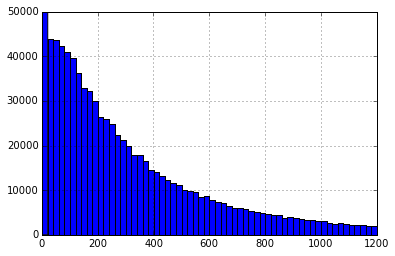

In [359]:
merged.ewt.hist(range=(1,1200),bins=60)

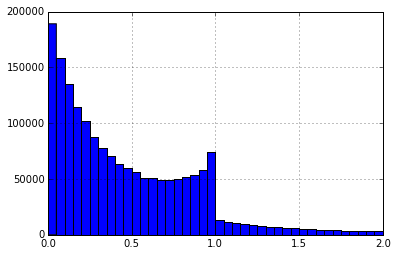

In [349]:
merged.headway_adh.hist(range=(0,2),bins=40)